In [41]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('data_earthquake.csv')

In [42]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [43]:
data.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [44]:
data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [45]:
data['Magnitude'].describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

### Check data skewness. It is right skewed and it is moderately correlated with Depth Seismic Stations.
skewness (+) - positively skewed/skewed right (right tail of the distribution is longer than the left).
skewness (-) - negatively skewed/skewed left (left tail is longer)
skewness = 0 - perfectly symmetrical

In [8]:
data['Magnitude'].skew()

1.848345706336882

In [46]:
data.corr()['Magnitude']

Latitude                      0.034987
Longitude                     0.038579
Depth                         0.023457
Depth Error                  -0.135880
Depth Seismic Stations        0.440582
Magnitude                     1.000000
Magnitude Error               0.135573
Magnitude Seismic Stations   -0.003972
Azimuthal Gap                -0.233579
Horizontal Distance          -0.092609
Horizontal Error             -0.078406
Root Mean Square              0.075865
Name: Magnitude, dtype: float64

### Heatmap of all the attributes of the data provided

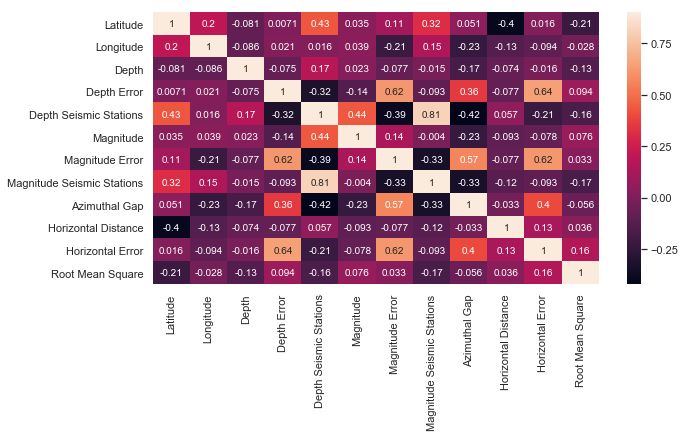

In [47]:
corr_matrix = data.corr()
plt.figure(figsize=(10,5)) 
sns.heatmap(corr_matrix, vmax=.9, annot=True) 

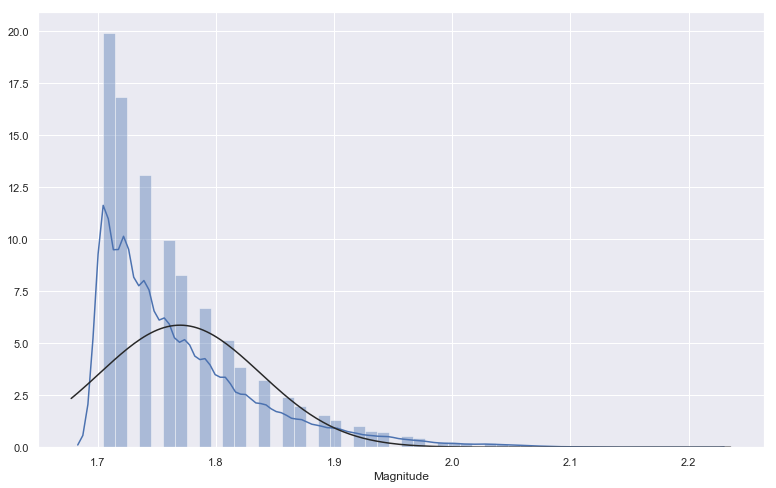

In [49]:
sns.distplot(np.log(data['Magnitude']),fit = norm)
sns.set(rc={'figure.figsize':(14,8)})

### Histogram of Depth 
Most earthquake rightly skewed and have depth less than 50 unit measure

Text(0.5,1,'Depth')

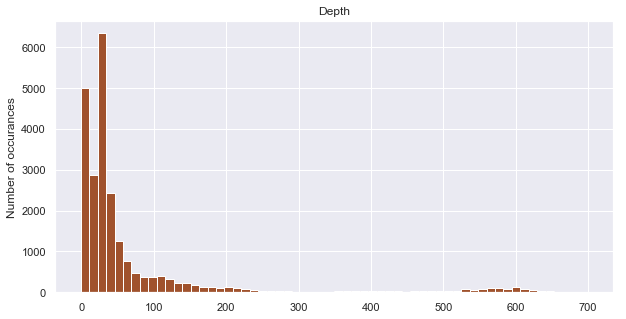

In [50]:
plt.figure(figsize=(10,5)) 
plt.hist(data['Depth'],color = 'sienna',align = 'mid',bins = 60)
plt.ylabel('Number of occurances')
plt.title('Depth')

In [ ]:
#Scatter plot between Depth Seismic stations and Magnitude and the variables have been normalized. p is veryless . 
#So, the relation is significant and R coefficient is 0.41 

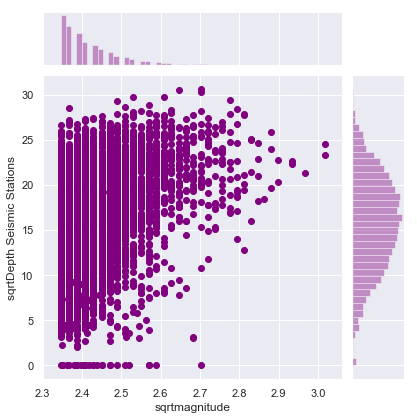

In [51]:
data['sqrtmagnitude']=np.sqrt(data['Magnitude'])
data['sqrtDepth Seismic Stations']=np.sqrt(data['Depth Seismic Stations'])
sns.jointplot(data['sqrtmagnitude'],data['sqrtDepth Seismic Stations'],color='purple');

### FEATURE ENGINEERING 
Create a new variable 'hour' from Time variable and convert it into string.

In [52]:
data['hour']=data['Time'].astype(str).str[:2]
data['hour'].head()

0    13
1    11
2    18
3    18
4    13
Name: hour, dtype: object

#### Explore Type variable to determine the siesmic activity is related to what activity

In [53]:
seismic_data = data['Type'].value_counts()
seismic_data

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

Text(0.5,1,'Seismic Activity Type')

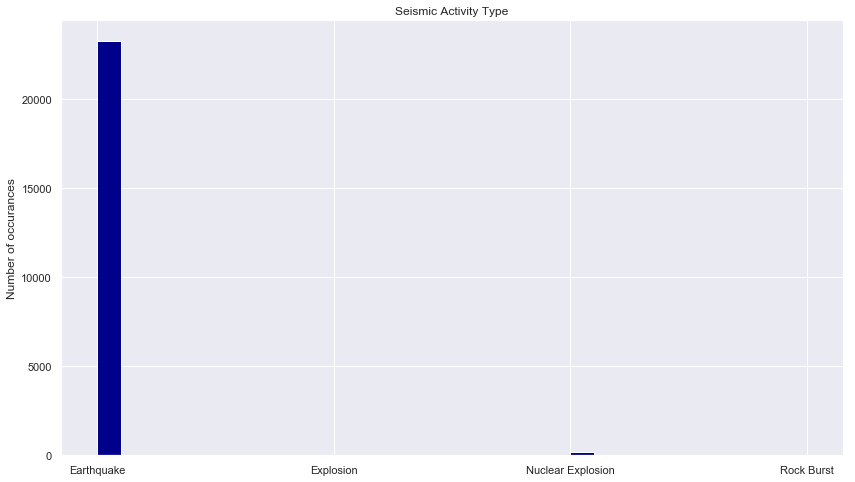

In [54]:
plt.hist(data['Type'],color = 'darkblue',align = 'mid',bins = 30)
plt.ylabel('Number of occurances')
plt.title('Seismic Activity Type')

#### Determine the time occurence of most seismic activity 

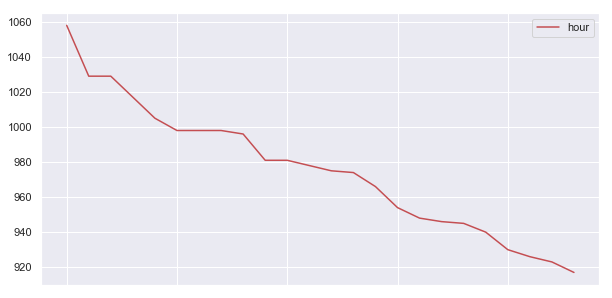

In [74]:
df = pd.DataFrame(data['hour'].value_counts())
df.plot(kind = 'line',figsize = (10,5),color = 'r')

#### FEATURE ENGINEERING 
Create a YEAR and MONTH columns for further analysis. Use Datetime function

In [59]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status',
       'sqrtmagnitude', 'sqrtDepth Seismic Stations', 'hour'],
      dtype='object')

In [60]:
data['Date'] = pd.to_datetime(data['Date'])

In [61]:
data['year'], data['month'] = data['Date'].dt.year, data['Date'].dt.month

In [63]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status',
       'sqrtmagnitude', 'sqrtDepth Seismic Stations', 'hour', 'year', 'month'],
      dtype='object')

### BAR GRAPH Nuclear Explosion Distribution
Most occured in 70's and 80's

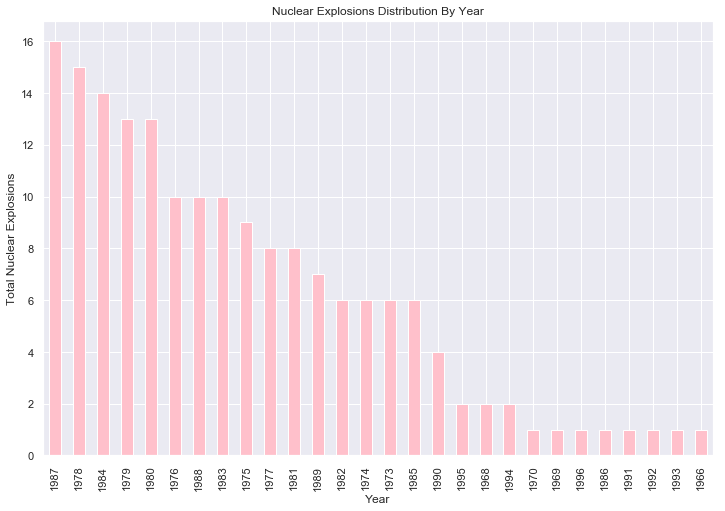

In [106]:
t = data[data['Type'] =='Nuclear Explosion']
t1=t['year'].value_counts()
f, ax = plt.subplots(figsize=(15, 9))
t1.plot(kind = 'bar',figsize = (12,8),color = 'pink')
plt.xlabel('Year')
plt.ylabel('Total Nuclear Explosions')
plt.title('Nuclear Explosions Distribution By Year')
plt.show()

## Table shows the count of disasters occured year wise.

In [112]:
df = pd.DataFrame(data['year'].value_counts())
df = df.rename(columns={'year': 'Total Disasters occured'})
df['Year'] = df.index.values
df.head()

,Total Disasters occured,Year
2011,713,2011
2007,608,2007
1995,591,1995
2004,571,2004
2010,560,2010


## BAR GRAPH Count Of Disasters Occured In Each Year. 
The Dark blue line shows the mean (450) of all the disasters occured. Historically, the number of earthquakes are increasing from 1995 till 2011 and then, the count has changed very largely.  

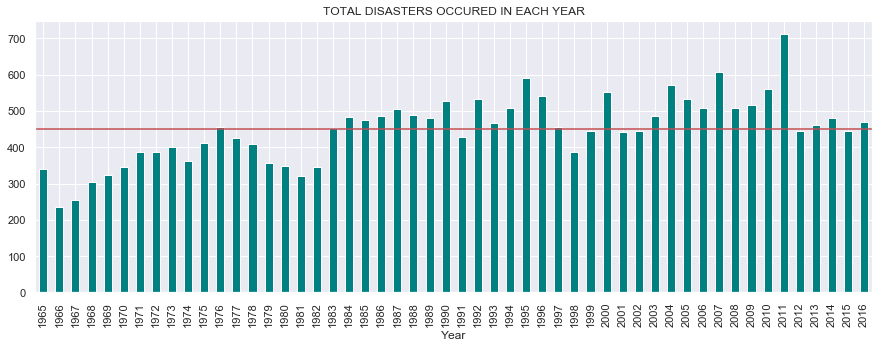

In [120]:
bar_plot = plt.subplot()
bar_plot.set_title('TOTAL DISASTERS OCCURED IN EACH YEAR')
df.groupby('Year').mean()['Total Disasters occured'].plot(kind='bar',figsize=(15,5),color = 'teal')
bar_plot.axhline(df['Total Disasters occured'].mean(), ls='-', color='r')

## Total Disasters occured group by Source. Most of the sources are US and ISCGEM

In [131]:
df1 = pd.DataFrame(data['Source'].value_counts())
df1 = df1.rename(columns={'Source': 'Total Disasters occured'})
df1['Source'] = df1.index.values
df1.head()

,Total Disasters occured,Source
US,20630,US
ISCGEM,2460,ISCGEM
ISCGEMSUP,120,ISCGEMSUP
CI,61,CI
GCMT,55,GCMT


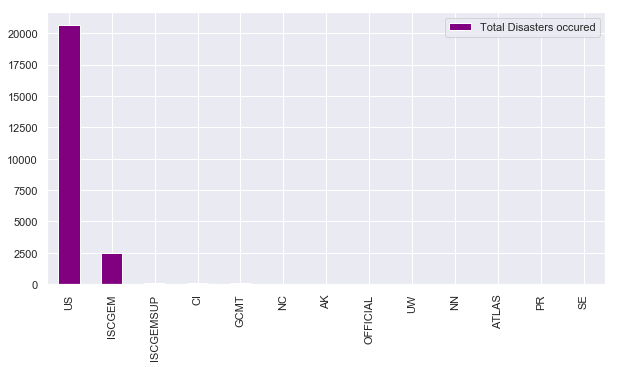

In [132]:
df1.plot(kind = 'bar',figsize = (10,5),color = 'purple')

## Bar graph plot - The plot considers 3 categorical variables - Source , Type and Magnitude Source

In [136]:
data_x = data.groupby(['Source', 'Type','Magnitude Source']).size()
data_x.head()

Source  Type               Magnitude Source
AK      Earthquake         AK                  12
ATLAS   Earthquake         ATLAS                3
CI      Earthquake         CI                  49
        Nuclear Explosion  CI                  12
GCMT    Earthquake         GCMT                55
dtype: int64

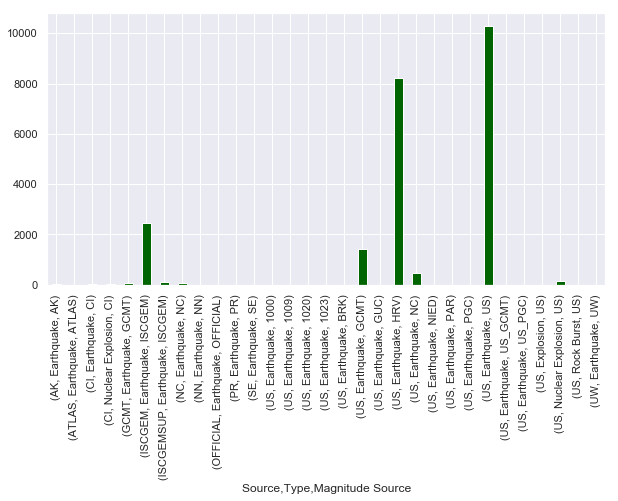

In [135]:
x.plot(kind = 'bar',figsize = (10,5),color = 'darkgreen')

### Scatter Plot between Depth and Magnitude

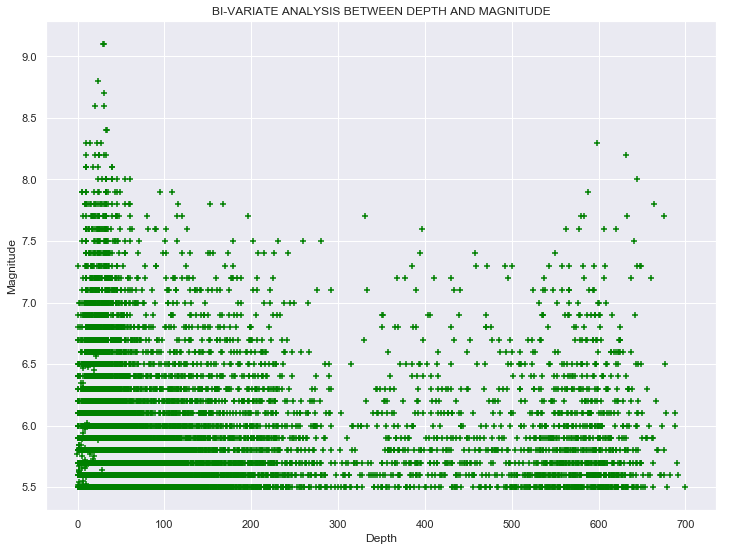

In [137]:
f, ax = plt.subplots(figsize=(12, 9))
plt.scatter('Depth','Magnitude',data = data,color = 'green',marker = '+')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('BI-VARIATE ANALYSIS BETWEEN DEPTH AND MAGNITUDE')
plt.show()

#### Describe all the attributes of the data. 

In [91]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,sqrtmagnitude,sqrtDepth Seismic Stations,year,month
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23412.000000,7097.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784,2.423913,15.772010,1992.632411,6.586494
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545,0.084706,5.158638,14.426100,3.473324
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,2.345208,0.000000,1965.000000,1.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,2.366432,12.083046,1981.000000,4.000000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,2.387467,15.968719,1993.000000,7.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,2.449490,19.595918,2005.000000,10.000000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,3.016621,30.561414,2016.000000,12.000000


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 26 columns):
Date                          23412 non-null datetime64[ns]
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null ob

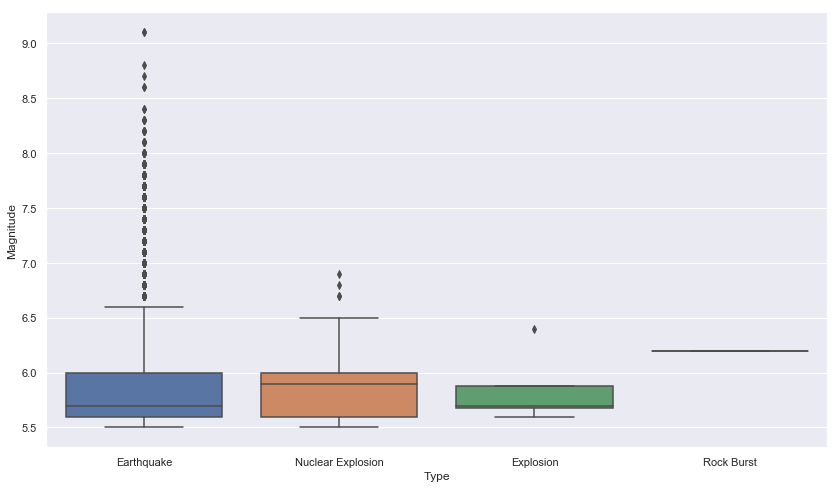

In [93]:
sns.boxplot(x = "Type", y = "Magnitude",data = data)